# ZAMBIA GRUMP CENTROID

In [2]:
import os

# set working directory
cwd = os.getcwd()
os.chdir('/Users/cascade/Github/NightTimeLightsAfrica/data/raw/grumpdata/Centroids/gpw-v4-admin-unit-center-points-population-estimates-rev10_zmb_csv/')

print(cwd)

/Users/cascade/Github/NightTimeLightsAfrica/data/raw/grumpdata/Centroids/gpw-v4-admin-unit-center-points-population-estimates-rev10_zmb_csv


In [3]:
import csv
import pandas as pd
import numpy as np

zambia = pd.read_csv('gpw_v4_admin_unit_center_points_population_estimates_rev10_zmb.csv')

In [4]:
zambia_pop = pd.concat([zambia.NAME3, zambia.CENTROID_X, zambia.CENTROID_Y, zambia.UN_2000_E, 
                        zambia.UN_2005_E, zambia.UN_2010_E, zambia.UN_2015_E,
                        zambia.UN_2020_E], axis = 1)

In [5]:
pd.DataFrame.sum(zambia_pop)

NAME3         Wusakile ConstituencyKabwata ConstituencyChika...
CENTROID_X                                              4251.86
CENTROID_Y                                             -2018.78
UN_2000_E                                              10585218
UN_2005_E                                              12043586
UN_2010_E                                              13917434
UN_2015_E                                              16211765
UN_2020_E                                              18882332
dtype: object

In [6]:
# Group by district
dist_2000_tot = ((zambia.groupby('NAME2')['UN_2000_E'].sum())) 
dist_2020_tot = ((zambia.groupby('NAME2')['UN_2020_E'].sum())) 

In [7]:
dist_0020_df = pd.concat([dist_2000_tot, dist_2020_tot], axis=1)
dist_0020_df.columns = ['dist_2000', 'dist_2020']
dist_0020_df['totchng_0020'] = dist_0020_df.dist_2020 - dist_0020_df.dist_2000
dist_0020_df['totpct_0020'] = dist_0020_df.totchng_0020 / dist_0020_df.dist_2000 *100
dist_0020_df['NAME2'] = dist_0020_df.index
dist_0020_df['pctchng_dtotchng'] = (dist_0020_df.dist_2020 - dist_0020_df.dist_2000) / [18882332-10585218] * 100 #<-- contribution to total change

### This opens a wierd question - if Lusaka makes over 20% pct change out of total change ... is that from natural increase???

In [8]:
dist_0020_df[30:100]

,dist_2000,dist_2020,totchng_0020,totpct_0020,NAME2,pctchng_dtotchng
NAME2,,,,,,
Kitwe District,410413,721725,311312,75.853348,Kitwe District,3.752052
Livingstone District,112704,190268,77564,68.820982,Livingstone District,0.934831
Luangwa District,20675,31478,10803,52.251511,Luangwa District,0.130202
Luanshya District,161392,170851,9459,5.860885,Luanshya District,0.114003
Lufwanyama District,68945,98485,29540,42.845747,Lufwanyama District,0.356027
Lukulu District,62320,130765,68445,109.828306,Lukulu District,0.824925
Lundazi District,258424,447968,189544,73.346129,Lundazi District,2.284457
Lusaka District,1159946,2972743,1812797,156.282879,Lusaka District,21.848525
Luwingu District,88120,186514,98394,111.659101,Luwingu District,1.185882


/anaconda3/lib/python3.7/site-packages/ggplot/ggplot.py:420: FutureWarning: 'NAME2' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  return mappers, data.groupby(groups)


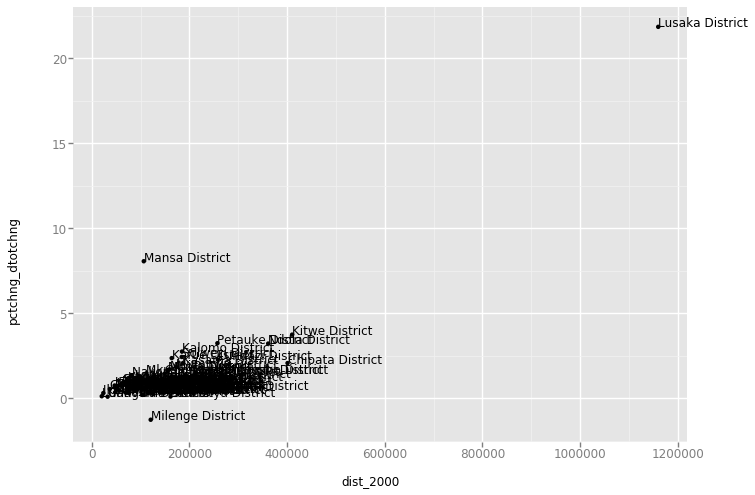

<ggplot: (282152712)>

In [10]:
from ggplot import *
ggplot(aes(x='dist_2000', y='pctchng_dtotchng', label = 'NAME2'), data=dist_0020_df) +\
    geom_point() +\
    geom_text()